In [12]:
import json

# Load the JSON data
with open('small_EV_TS_data2018-04-26.json', 'r') as f:
    data = json.load(f)

timestamps = (data[1][0]['chargingCurrent']["timestamps"])
previous_time = None
for i, timestamp in enumerate(timestamps):
    current_time = datetime.strptime(timestamp, '%a, %d %b %Y %H:%M:%S %Z')
    if previous_time is not None and current_time - previous_time >= timedelta(minutes=2):
        print(i)
    previous_time = current_time

In [21]:
import pandas as pd

# create example dataframe
df = pd.DataFrame({'time': [1, 2, 3, 4, 5, 6, 7, 8],
                   'current': [3, 4, 1, 5, 2, 6, 4, 3],
                   'id': [1, 1, 2, 3, 2, 1, 3, 2]})

# create new column with cumulative sum by id
cumulative_sum = {}
cumulative_current = []
for index, row in df.iterrows():
    current_id = row['id']
    current_value = row['current']
    if current_id in cumulative_sum:
        last_value = cumulative_sum[current_id]
        if row['current'] != last_value:
            keys = list(cumulative_sum.keys())
            values = list(cumulative_sum.values())
            last_id_index = keys[::-1].index(current_id)
            last_id_value = values[-1 - last_id_index]
            cumulative_sum[current_id] = last_id_value + current_value - last_value
    else:
        cumulative_sum[current_id] = current_value
    cumulative_current.append(sum(cumulative_sum.values()))

df['cumulative_current'] = cumulative_current

print(df['cumulative_current'].values)


[ 3  4  5 10 11 13 12 13]


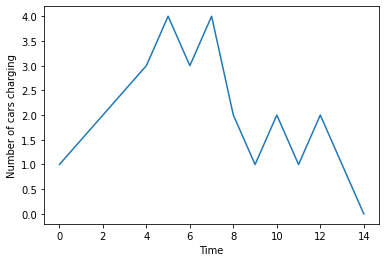

In [23]:
import matplotlib.pyplot as plt

# Sample connection times and finish times
connection_times = [0, 2, 4, 5, 7, 10, 12]
finish_times = [6, 8, 8, 9, 11, 13, 14]

# Step 1: Create a list of time points
time_points = sorted(set(connection_times + finish_times))

# Step 2: Calculate the number of cars charging at each time point
num_cars_charging = []
for t in time_points:
    num_charging = sum(c <= t and f > t for c, f in zip(connection_times, finish_times))
    num_cars_charging.append(num_charging)

# Step 3: Plot the data
plt.plot(time_points, num_cars_charging)
plt.xlabel("Time")
plt.ylabel("Number of cars charging")
plt.show()


Problem
(15, 58, 25)
(2, 38, 2)
Problem
(16, 51, 4)
(1, 2, 5)


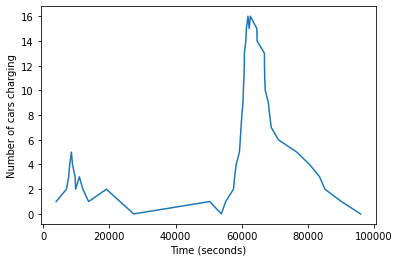

[(1, 5, 45), (1, 57, 23), (2, 8, 46), (2, 13, 49), (2, 22, 29), (3, 2, 19), (5, 18, 42), (13, 58, 49), (15, 19, 17), (15, 58, 25), (16, 4, 12), (16, 11, 57), (16, 28, 20), (16, 32, 39), (16, 36, 12), (16, 40, 36), (16, 46, 20), (16, 48, 5), (16, 51, 4), (16, 52, 59), (16, 53, 20), (17, 0, 33), (17, 3, 30), (17, 11, 20), (17, 23, 24)]
[(3, 20, 7), (2, 28, 2), (2, 41, 0), (2, 43, 49), (3, 49, 6), (7, 36, 23), (6, 26, 56), (14, 57, 4), (23, 12, 5), (26, 38, 2), (17, 17, 33), (18, 34, 20), (18, 35, 41), (17, 55, 59), (17, 57, 18), (18, 38, 29), (19, 44, 34), (23, 38, 49), (25, 2, 5), (18, 34, 28), (19, 8, 25), (19, 0, 39), (18, 54, 2), (21, 17, 20), (22, 21, 16)]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

[3945, 7043, 7726, 8029, 8549, 10939, 19122, 50329, 55157, 57505, 57852, 58317, 59300, 59559, 59772, 60036, 60380, 60485, 60664, 60779, 60800, 61233, 61410

In [52]:
from datetime import datetime

# example data
connection_times = ['Thu, 14 Feb 2019 01:05:45 GMT', 'Thu, 14 Feb 2019 01:57:23 GMT', 'Thu, 14 Feb 2019 02:08:46 GMT', 'Thu, 14 Feb 2019 02:13:49 GMT', 'Thu, 14 Feb 2019 02:22:29 GMT', 'Thu, 14 Feb 2019 03:02:19 GMT', 'Thu, 14 Feb 2019 05:18:42 GMT', 'Thu, 14 Feb 2019 13:58:49 GMT', 'Thu, 14 Feb 2019 15:19:17 GMT', 'Thu, 14 Feb 2019 15:58:25 GMT', 'Thu, 14 Feb 2019 16:04:12 GMT', 'Thu, 14 Feb 2019 16:11:57 GMT', 'Thu, 14 Feb 2019 16:28:20 GMT', 'Thu, 14 Feb 2019 16:32:39 GMT', 'Thu, 14 Feb 2019 16:36:12 GMT', 'Thu, 14 Feb 2019 16:40:36 GMT', 'Thu, 14 Feb 2019 16:46:20 GMT', 'Thu, 14 Feb 2019 16:48:05 GMT', 'Thu, 14 Feb 2019 16:51:04 GMT', 'Thu, 14 Feb 2019 16:52:59 GMT', 'Thu, 14 Feb 2019 16:53:20 GMT', 'Thu, 14 Feb 2019 17:00:33 GMT', 'Thu, 14 Feb 2019 17:03:30 GMT', 'Thu, 14 Feb 2019 17:11:20 GMT', 'Thu, 14 Feb 2019 17:23:24 GMT']
completion_times = ['Thu, 14 Feb 2019 03:20:07 GMT', 'Thu, 14 Feb 2019 02:28:02 GMT', 'Thu, 14 Feb 2019 02:41:00 GMT', 'Thu, 14 Feb 2019 02:43:49 GMT', 'Thu, 14 Feb 2019 03:49:06 GMT', 'Thu, 14 Feb 2019 07:36:23 GMT', 'Thu, 14 Feb 2019 06:26:56 GMT', 'Thu, 14 Feb 2019 14:57:04 GMT', 'Thu, 14 Feb 2019 23:12:05 GMT', 'Fri, 15 Feb 2019 02:38:02 GMT', 'Thu, 14 Feb 2019 17:17:33 GMT', 'Thu, 14 Feb 2019 18:34:20 GMT', 'Thu, 14 Feb 2019 18:35:41 GMT', 'Thu, 14 Feb 2019 17:55:59 GMT', 'Thu, 14 Feb 2019 17:57:18 GMT', 'Thu, 14 Feb 2019 18:38:29 GMT', 'Thu, 14 Feb 2019 19:44:34 GMT', 'Thu, 14 Feb 2019 23:38:49 GMT', 'Fri, 15 Feb 2019 01:02:05 GMT', 'Thu, 14 Feb 2019 18:34:28 GMT', 'Thu, 14 Feb 2019 19:08:25 GMT', 'Thu, 14 Feb 2019 19:00:39 GMT', 'Thu, 14 Feb 2019 18:54:02 GMT', 'Thu, 14 Feb 2019 21:17:20 GMT', 'Thu, 14 Feb 2019 22:21:16 GMT']
# convert time points to datetime objects
connection_times_dt = [datetime.strptime(t, '%a, %d %b %Y %H:%M:%S %Z') for t in connection_times]
completion_times_dt = [datetime.strptime(t, '%a, %d %b %Y %H:%M:%S %Z') for t in completion_times]

# extract time component (hour, minute, second)
connection_times_hms = [(t.hour, t.minute, t.second) for t in connection_times_dt]
completion_times_hms = [(t.hour, t.minute, t.second) for t in completion_times_dt]

for i in range(len(connection_times_hms)):
    if connection_times_hms[i] > completion_times_hms[i]:
        print('Problem')
        print(connection_times_hms[i])
        print(completion_times_hms[i])
        new_hour = completion_times_hms[i][0] + 24
        new_completion_time = (new_hour, completion_times_hms[i][1], completion_times_hms[i][2])
        completion_times_hms[i] = (new_hour, completion_times_hms[i][1], completion_times_hms[i][2])
        


import matplotlib.pyplot as plt

# create list of time points (in seconds)
time_points = [t[0]*3600 + t[1]*60 + t[2] for t in connection_times_hms + completion_times_hms]

# create list of charging status (1 for connection time, -1 for completion time)
charging_status = [1] * len(connection_times) + [-1] * len(completion_times)

# sort time points and charging status by time point
sorted_indices = sorted(range(len(time_points)), key=lambda k: time_points[k])
time_points_sorted = [time_points[i] for i in sorted_indices]
charging_status_sorted = [charging_status[i] for i in sorted_indices]

# calculate cumulative sum of charging status over time
cumulative_charging = [sum(charging_status_sorted[:i+1]) for i in range(len(charging_status_sorted))]

# create line graph
plt.plot(time_points_sorted, cumulative_charging)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of cars charging')
plt.show()

print(connection_times_hms)
print(completion_times_hms)
print(charging_status)

print()
print(time_points)
print(time_points_sorted)
print(charging_status_sorted)


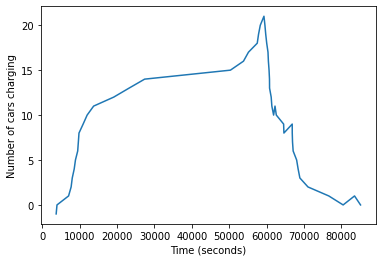

[3725, 3945, 7043, 7726, 8029, 8549, 8882, 9482, 9660, 9829, 10939, 12007, 13746, 19122, 23216, 27383, 50329, 53824, 55157, 57505, 57852, 58317, 59300, 59559, 59772, 60036, 60380, 60485, 60664, 60779, 60800, 61233, 61410, 61880, 62253, 62604, 64559, 64638, 66860, 66868, 66941, 67109, 68042, 68439, 68905, 71074, 76640, 80476, 83525, 85129]
[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


In [40]:
from datetime import datetime, timedelta

# example data
# connection_times = ['Thu, 14 Feb 2019 16:46:20 GMT', 'Thu, 14 Feb 2019 16:48:05 GMT', 'Thu, 14 Feb 2019 16:51:04 GMT', 'Thu, 14 Feb 2019 16:52:59 GMT', 'Thu, 14 Feb 2019 16:53:20 GMT', 'Thu, 14 Feb 2019 17:00:33 GMT', 'Thu, 14 Feb 2019 17:03:30 GMT', 'Thu, 14 Feb 2019 17:11:20 GMT', 'Thu, 14 Feb 2019 17:23:24 GMT']
# completion_times = ['Thu, 14 Feb 2019 19:44:34 GMT', 'Thu, 14 Feb 2019 23:38:49 GMT', 'Fri, 15 Feb 2019 01:02:05 GMT', 'Thu, 14 Feb 2019 18:34:28 GMT', 'Thu, 14 Feb 2019 19:08:25 GMT', 'Thu, 14 Feb 2019 19:00:39 GMT', 'Thu, 14 Feb 2019 18:54:02 GMT', 'Thu, 14 Feb 2019 21:17:20 GMT', 'Thu, 14 Feb 2019 22:21:16 GMT']
connection_times = ['Thu, 14 Feb 2019 01:05:45 GMT', 'Thu, 14 Feb 2019 01:57:23 GMT', 'Thu, 14 Feb 2019 02:08:46 GMT', 'Thu, 14 Feb 2019 02:13:49 GMT', 'Thu, 14 Feb 2019 02:22:29 GMT', 'Thu, 14 Feb 2019 03:02:19 GMT', 'Thu, 14 Feb 2019 05:18:42 GMT', 'Thu, 14 Feb 2019 13:58:49 GMT', 'Thu, 14 Feb 2019 15:19:17 GMT', 'Thu, 14 Feb 2019 15:58:25 GMT', 'Thu, 14 Feb 2019 16:04:12 GMT', 'Thu, 14 Feb 2019 16:11:57 GMT', 'Thu, 14 Feb 2019 16:28:20 GMT', 'Thu, 14 Feb 2019 16:32:39 GMT', 'Thu, 14 Feb 2019 16:36:12 GMT', 'Thu, 14 Feb 2019 16:40:36 GMT', 'Thu, 14 Feb 2019 16:46:20 GMT', 'Thu, 14 Feb 2019 16:48:05 GMT', 'Thu, 14 Feb 2019 16:51:04 GMT', 'Thu, 14 Feb 2019 16:52:59 GMT', 'Thu, 14 Feb 2019 16:53:20 GMT', 'Thu, 14 Feb 2019 17:00:33 GMT', 'Thu, 14 Feb 2019 17:03:30 GMT', 'Thu, 14 Feb 2019 17:11:20 GMT', 'Thu, 14 Feb 2019 17:23:24 GMT']
completion_times = ['Thu, 14 Feb 2019 03:20:07 GMT', 'Thu, 14 Feb 2019 02:28:02 GMT', 'Thu, 14 Feb 2019 02:41:00 GMT', 'Thu, 14 Feb 2019 02:43:49 GMT', 'Thu, 14 Feb 2019 03:49:06 GMT', 'Thu, 14 Feb 2019 07:36:23 GMT', 'Thu, 14 Feb 2019 06:26:56 GMT', 'Thu, 14 Feb 2019 14:57:04 GMT', 'Thu, 14 Feb 2019 23:12:05 GMT', 'Fri, 15 Feb 2019 02:38:02 GMT', 'Thu, 14 Feb 2019 17:17:33 GMT', 'Thu, 14 Feb 2019 18:34:20 GMT', 'Thu, 14 Feb 2019 18:35:41 GMT', 'Thu, 14 Feb 2019 17:55:59 GMT', 'Thu, 14 Feb 2019 17:57:18 GMT', 'Thu, 14 Feb 2019 18:38:29 GMT', 'Thu, 14 Feb 2019 19:44:34 GMT', 'Thu, 14 Feb 2019 23:38:49 GMT', 'Fri, 15 Feb 2019 01:02:05 GMT', 'Thu, 14 Feb 2019 18:34:28 GMT', 'Thu, 14 Feb 2019 19:08:25 GMT', 'Thu, 14 Feb 2019 19:00:39 GMT', 'Thu, 14 Feb 2019 18:54:02 GMT', 'Thu, 14 Feb 2019 21:17:20 GMT', 'Thu, 14 Feb 2019 22:21:16 GMT']
# convert time points to datetime objects
# convert time points to datetime objects
connection_times_dt = [datetime.strptime(t, '%a, %d %b %Y %H:%M:%S %Z') for t in connection_times]
completion_times_dt = [datetime.strptime(t, '%a, %d %b %Y %H:%M:%S %Z') for t in completion_times]

# extract time component (hour, minute, second)
connection_times_hms = [(t.hour, t.minute, t.second) for t in connection_times_dt]
completion_times_hms = [(t.hour, t.minute, t.second) for t in completion_times_dt]

import matplotlib.pyplot as plt

# create list of time points (in seconds)
time_points = []
for i in range(len(connection_times)):
    # calculate time point for connection time
    ct = connection_times_dt[i]
    ct_seconds = ct.hour*3600 + ct.minute*60 + ct.second
    
    # calculate time point for completion time, adjusting for different day
    comp_time = completion_times_dt[i]
    if comp_time.day != ct.day:
        comp_time += timedelta(days=1)
    comp_seconds = comp_time.hour*3600 + comp_time.minute*60 + comp_time.second
    
    # add time points to list
    time_points.append(ct_seconds)
    time_points.append(comp_seconds)

# create list of charging status (1 for connection time, -1 for completion time)
charging_status = [1] * len(connection_times) + [-1] * len(completion_times)

# sort time points and charging status by time point
sorted_indices = sorted(range(len(time_points)), key=lambda k: time_points[k])
time_points_sorted = [time_points[i] for i in sorted_indices]
charging_status_sorted = [charging_status[i] for i in sorted_indices]

# calculate cumulative sum of charging status over time
cumulative_charging = [sum(charging_status_sorted[:i+1]) for i in range(len(charging_status_sorted))]

# create line graph
plt.plot(time_points_sorted, cumulative_charging)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of cars charging')
plt.show()

# print(connection_times_hms)
# print(completion_times_hms)
# print(charging_status)

# print()
# print(time_points)
print(time_points_sorted)
print(charging_status_sorted)


In [57]:
import numpy as np
from scipy.interpolate import interp1d

# sample data
x1 = np.array([1, 4, 5, 6, 8, 10])
x2 = np.array([3, 7, 9])
y1 = np.array([10, 20, 30, 25, 15, 9])
y2 = np.array([5, 9, 13])

plt.plot(x1, x2)
plt.legend()